In [1]:
%load_ext autoreload
%autoreload 2
import os
import torch as t
from utils.config import opt
from model import FasterRCNNVGG16
from trainer import FasterRCNNTrainer
from data.util import  read_image
from utils.vis_tool import vis_bbox
from utils.config import opt
from utils import array_tool as at
from utils import eval_tool as et
from data.dataset import Dataset, VOCBboxDataset
from compare import compare, pair_bboxes, average_bboxes
%matplotlib inline

d:\nauka\inzynierka\simple-faster-rcnn-pytorch-master\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
t.cuda.is_available()

True

In [11]:
img = read_image('misc/demo.jpg')
img = t.from_numpy(img)[None]
img = img.cuda()

In [3]:
faster_rcnn = FasterRCNNVGG16()
trainer = FasterRCNNTrainer(faster_rcnn).cuda()

Setting up a new session...
Without the incoming socket you cannot receive events from the server or register event handlers to your Visdom client.


In [4]:
dataset = VOCBboxDataset('../VOCdevkit/VOC2007/')
test_ds =  VOCBboxDataset('../VOCdevkit/VOC2007/', split='test')

<AxesSubplot: >

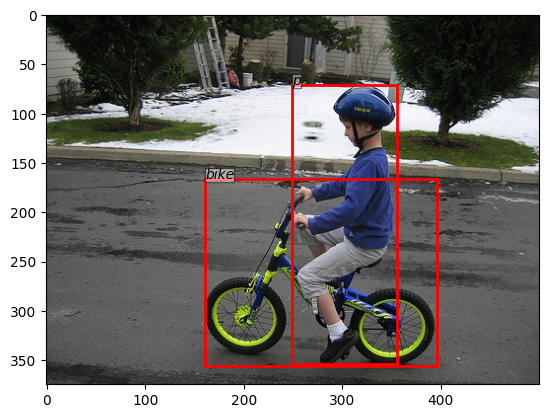

In [26]:
img1, bboxes1, labels1, _= test_ds[112]
vis_bbox(img1,
         at.tonumpy(bboxes1),
         at.tonumpy(labels1))

<AxesSubplot: >

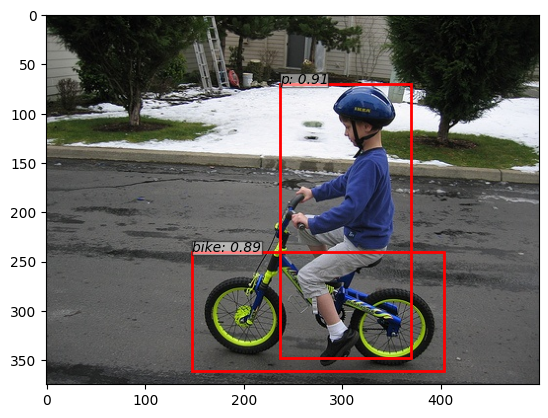

In [74]:
trainer.load('./4/fasterrcnn_01111442_0.5772616022672624')
opt.caffe_pretrain=False
img1 = t.from_numpy(img1)[None]
img1 = img1.cuda()
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img1, visualize=True)

vis_bbox(at.tonumpy(img1[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))

In [17]:
trainer.load('./2/fasterrcnn_01111137_0.488791802308461')
_bboxes2, _labels2, _scores2 = trainer.faster_rcnn.predict(img1, visualize=True)

<AxesSubplot: >

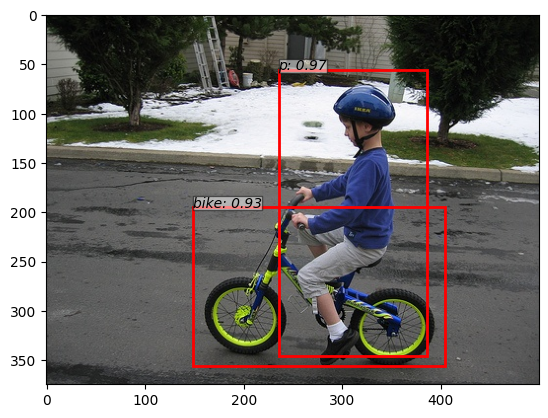

In [75]:
vis_bbox(at.tonumpy(img1[0]),
         at.tonumpy(_bboxes2[0]),
         at.tonumpy(_labels2[0]).reshape(-1),
         at.tonumpy(_scores2[0]).reshape(-1))

In [18]:
trainer.load('./1/fasterrcnn_01121622_0.5451522401066323')
_bboxes3, _labels3, _scores3 = trainer.faster_rcnn.predict(img1, visualize=True)

<AxesSubplot: >

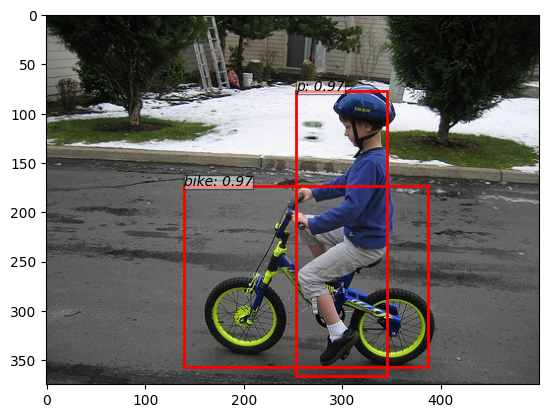

In [76]:
vis_bbox(at.tonumpy(img1[0]),
         at.tonumpy(_bboxes3[0]),
         at.tonumpy(_labels3[0]).reshape(-1),
         at.tonumpy(_scores3[0]).reshape(-1))

In [89]:
from compare import average_bboxes, average_classes
import numpy as np

targets = [{'boxes': _bboxes[0], 'labels': _labels[0]}, 
           {'boxes': _bboxes2[0], 'labels': _labels2[0]}, 
           {'boxes': _bboxes3[0], 'labels': _labels3[0]}]
paired_bbox, paired_labels = pair_bboxes(targets)

In [90]:
average_bboxes(paired_bbox)

array([[202.70508, 145.24358, 357.87134, 398.25903],
       [ 67.33477, 241.71252, 353.44193, 367.14444]], dtype=float32)

In [91]:
compare(average_bboxes(paired_bbox),
        average_classes(paired_labels),
        at.tonumpy(bboxes1),
        at.tonumpy(labels1))

[{'box_mean': array([202.70508, 145.24358, 357.87134, 398.25903], dtype=float32),
  'label_mean': 1,
  'box_test': array([166., 161., 356., 396.], dtype=float32),
  'label_test': 1,
  'err': 0},
 {'box_mean': array([ 67.33477, 241.71252, 353.44193, 367.14444], dtype=float32),
  'label_mean': 14,
  'box_test': array([ 71., 249., 354., 356.], dtype=float32),
  'label_test': 14,
  'err': 0}]